# Parameter Estimation - NLP

ref: Jalving, J. and Zavala, V.M. Optimization in Chemical and Biological Engineering using Julia

We seek to estimate the parameters for a dynamical model that describes competitive and cooperative effects of a microbial community with two species. This behavior is captured through the Lotka-Volterra model. 

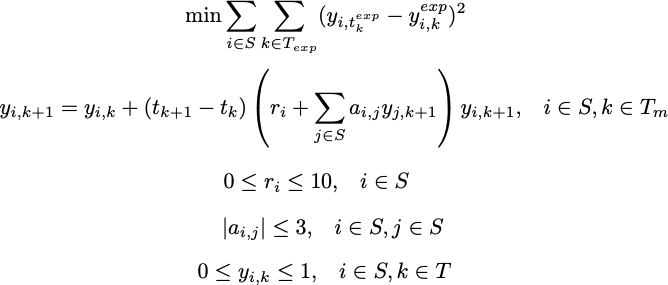



In [1]:
using JuMP, Ipopt, Plots

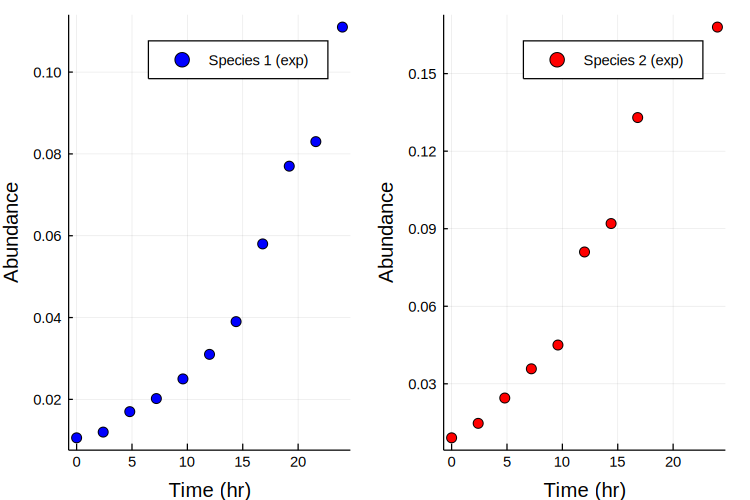

In [2]:
# Data
t = linspace(0,24,101) # set of simulation times
t_exp = 1:10:101 # set of experimental times

# experimental observations
y_exp=[0.0106 0.0120 0.0170 0.0202 0.025 0.031 0.039 0.058 0.077 0.083 0.111
0.0091 0.0147 0.0245 0.0358 0.045 0.081 0.092 0.133 0.153 0.160 0.168]

 plot(t[t_exp],y_exp',label=["Species 1 (exp)" "Species 2 (exp)"],
 seriestype=:scatter, color =[:blue :red], xlabel="Time (hr)", ylabel="Abundance", dpi=500, layout = 2)


In [6]:
m=Model(solver=IpoptSolver())

 # define variables
 @variable(m, 0 <= r[i in 1:2] <=10, start = 1) # growth rates
 @variable(m,-3 <= a[i in 1:2, k in 1:2] <= 3, start =1) # interaction parameters
 @variable(m, 0 <= y[i in 1:2, k in 1:length(t)] <= 1, start = 1) # abundance

 # define model
 @NLconstraint(m, [i in 1:2,k in 1:length(t)-1],
 y[i,k+1] == y[i,k]+( r[i] + sum( a[i,j] *y[j,k+1] for j in 1:2 )) *y[i,k+1]*(t[k+1]-t[k]))

 # define objective
 # @objective(m, Min, sum(( (y[i,t_exp[k]]-y_exp[i,k]) )^2 for i in 1:2 for k in 1:length(t_exp)))
 @objective(m, Min, sum(( (y[i,t_exp[k]]-y_exp[i,k])/y_exp[i,k] )^2 for i in 1:2 for k in 1:length(t_exp))) # scaled objective

 solve(m)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.1, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1200
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     3022

Total number of variables............................:      208
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      208
                     variables with only upper bounds:        0
Total number of equa

:Optimal

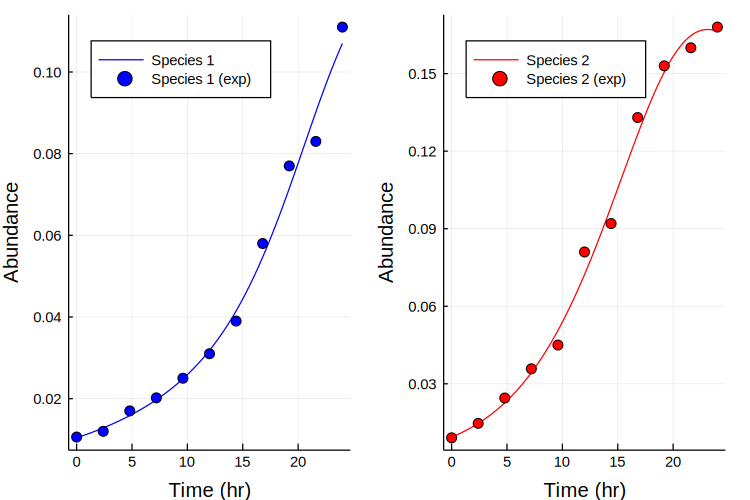

In [7]:
# Obtain the solution
 r_sol = getvalue(r)
 a_sol = getvalue(a)
 y_sol = getvalue(y)

 p=plot(t,y_sol',xlabel="Time (hr)", ylabel="Abundance", label=["Species 1" "Species 2"],
 color =[:blue :red], legend=:topleft, layout = 2)

 plot!(p,t[t_exp],y_exp',label=["Species 1 (exp)" "Species 2 (exp)"],
 seriestype=:scatter, color =[:blue :red], dpi=500)

#savefig(p, "least_squares.pdf")